In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./data/2019가계부채/label_2019.csv', engine='python', encoding='cp949')
data

,Unnamed: 0,Unnamed: 0.1,조사연도,가구고유번호(MD제공용),가중치,수도권여부,가구주 성별,가구원수,노인가구,조손가구,...,가구주 미은퇴시_최소생활비,가구주 미은퇴시_적정생활비,가구주 미은퇴시_노후준비상황,가구주 은퇴시_가구주 은퇴실제 연령,가구주 은퇴시_적정생활비 충당여부,가구주 은퇴시_생활비 재원마련(2014년~),DTA,DSR,HDRI,부실가계
0,0,1,2019,10500141,2980.009764,수도권,남자,6,그 외 가구,그 외 가구,...,200,350,잘 되어 있지 않다,NaN,NaN,NaN,1.512039,0.520243,263.228144,1
1,1,4,2019,10500171,2159.784960,수도권,남자,4,그 외 가구,그 외 가구,...,200,300,전혀 되어 있지 않다,NaN,NaN,NaN,4.541446,0.230088,537.153470,0
2,2,5,2019,10500181,2487.978853,수도권,남자,5,그 외 가구,그 외 가구,...,200,400,보통이다,NaN,NaN,NaN,0.930903,0.143253,167.415609,0
3,3,7,2019,10501201,1097.480908,비수도권,남자,3,그 외 가구,그 외 가구,...,300,500,전혀 되어 있지 않다,NaN,NaN,NaN,0.750000,0.000000,135.000000,1
4,4,8,2019,10501211,1839.298053,비수도권,남자,4,그 외 가구,그 외 가구,...,200,300,잘 되어 있지 않다,NaN,NaN,NaN,4.248588,0.464466,531.305316,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847,9847,18400,2019,994800251,349.528888,비수도권,남자,5,그 외 가구,그 외 가구,...,300,500,잘 되어 있다,NaN,NaN,NaN,0.965251,0.021878,158.712938,0
9848,9848,18401,2019,994800261,314.205314,비수도권,남자,5,그 외 가구,그 외 가구,...,0,0,NaN,56.0,보통이다,"개인 저축액 또는 사적연금(이자, 배당금 포함)",1.083480,0.298883,198.236274,0
9849,9849,18403,2019,995800211,393.813415,비수도권,남자,4,그 외 가구,그 외 가구,...,300,500,보통이다,NaN,NaN,NaN,0.341103,0.244248,118.535098,0
9850,9850,18404,2019,995800231,631.065023,비수도권,남자,3,그 외 가구,그 외 가구,...,300,500,잘 되어 있다,NaN,NaN,NaN,0.562228,0.088284,125.051230,0


In [3]:
# 담보대출 용도 및 출처
df_1 = data.iloc[:,51:64]

# 신용대출 용도 및 출처
df_2 = data.iloc[:,75:88]
df_2

# 가구주 직업은 상용근로자 or not, 입주형태는 자가 or not
df_3 = data[['가구주 성별','가구주교육정도 통합별','가구주 혼인상태','입주형태','수도권여부','가구주 직업(대분류)','부실가계']]

df = pd.concat([df_1,df_2,df_3],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9852 entries, 0 to 9851
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   담보대출                                 9852 non-null   float64
 1   담보대출_대출용도_거주주택 구입                    9852 non-null   int64  
 2   담보대출_대출용도_거주주택이외 부동산 구입              9852 non-null   float64
 3   담보대출_대출용도_전(월)세 보증금 마련               9852 non-null   int64  
 4   담보대출_대출용도_부채상환                       9852 non-null   int64  
 5   담보대출_대출용도_사업자금 마련                    9852 non-null   float64
 6   담보대출_대출용도_생활비 마련                     9852 non-null   int64  
 7   담보대출_대출용도_기타 용도 등                    9852 non-null   float64
 8   담보대출_대출기관_은행(2010년은 농수협 중앙회 제외)      9852 non-null   float64
 9   담보대출_대출기관_저축은행                       9852 non-null   int64  
 10  담보대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함)  9852 non-null   float64
 11  담보대출_대출기관_보험회사                

In [704]:
# df['HDRI'] = data['HDRI']
# df.drop(['금융부채',''])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9852 entries, 0 to 9851
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   담보대출                                 9852 non-null   float64
 1   담보대출_대출용도_거주주택 구입                    9852 non-null   int64  
 2   담보대출_대출용도_거주주택이외 부동산 구입              9852 non-null   float64
 3   담보대출_대출용도_전(월)세 보증금 마련               9852 non-null   int64  
 4   담보대출_대출용도_부채상환                       9852 non-null   int64  
 5   담보대출_대출용도_사업자금 마련                    9852 non-null   float64
 6   담보대출_대출용도_생활비 마련                     9852 non-null   int64  
 7   담보대출_대출용도_기타 용도 등                    9852 non-null   float64
 8   담보대출_대출기관_은행(2010년은 농수협 중앙회 제외)      9852 non-null   float64
 9   담보대출_대출기관_저축은행                       9852 non-null   int64  
 10  담보대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함)  9852 non-null   float64
 11  담보대출_대출기관_보험회사                

In [5]:
# 가구주직업 인코딩(단순노무 종사자=1, or 0)
for i in range(len(df['가구주 직업(대분류)'])):
    if df['가구주 직업(대분류)'][i]=='단순노무 종사자':
        df['가구주 직업(대분류)'][i]=1
    else:
        df['가구주 직업(대분류)'][i]=0
        
# 입주형태 인코딩(자기집 =1 , or 0)
for i in range(len(df['입주형태'])):
    if df['입주형태'][i]=='자기집':
        df['입주형태'][i]=1
    else:
        df['입주형태'][i]=0
        
# 가구주 혼인상태 인코딩(배우자있음 =1 , or 0)
for i in range(len(df['가구주 혼인상태'])):
    if df['가구주 혼인상태'][i]=='배우자있음':
        df['가구주 혼인상태'][i]=1
    else:
        df['가구주 혼인상태'][i]=0
        
# 가구주교육정도 통합별 인코딩(대학졸업 이상 =1 , or 0)
for i in range(len(df['가구주교육정도 통합별'])):
    if df['가구주교육정도 통합별'][i]=='대학졸업 이상':
        df['가구주교육정도 통합별'][i]=1
    else:
        df['가구주교육정도 통합별'][i]=0
        

<ipython-input-5-7b8159e00c8e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['가구주 직업(대분류)'][i]=0
<ipython-input-5-7b8159e00c8e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['가구주 직업(대분류)'][i]=1
<ipython-input-5-7b8159e00c8e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['입주형태'][i]=0
<ipython-input-5-7b8159e00c8e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

In [11]:
df

,담보대출,담보대출_대출용도_거주주택 구입,담보대출_대출용도_거주주택이외 부동산 구입,담보대출_대출용도_전(월)세 보증금 마련,담보대출_대출용도_부채상환,담보대출_대출용도_사업자금 마련,담보대출_대출용도_생활비 마련,담보대출_대출용도_기타 용도 등,담보대출_대출기관_은행(2010년은 농수협 중앙회 제외),담보대출_대출기관_저축은행,...,신용대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함),신용대출_대출기관_보험회사,신용대출_대출기관_기타 기관 등,가구주 성별,가구주교육정도 통합별,가구주 혼인상태,입주형태,수도권여부,가구주 직업(대분류),부실가계
0,4000.0,0,0.0,4000,0,0.0,0,0.0,4000.0,0,...,0,0,0,남자,1,1,0,수도권,0,1
1,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0,...,0,0,0,여자,0,0,0,수도권,0,0
2,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0,...,0,0,0,남자,0,1,1,수도권,0,0
3,10000.0,10000,0.0,0,0,0.0,0,0.0,10000.0,0,...,0,0,0,남자,0,1,1,수도권,0,0
4,23000.0,23000,0.0,0,0,0.0,0,0.0,23000.0,0,...,0,0,0,남자,1,1,1,수도권,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18401,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0,...,0,0,0,여자,1,0,0,비수도권,0,0
18402,3600.0,3600,0.0,0,0,0.0,0,0.0,3600.0,0,...,0,0,0,남자,1,1,1,비수도권,0,0
18403,9200.0,0,0.0,9200,0,0.0,0,0.0,0.0,0,...,0,0,0,남자,1,1,0,비수도권,0,0
18404,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0,...,0,0,0,여자,0,1,0,비수도권,0,0


In [694]:
# HDRI(100 이상 =1 , or 0)
for i in range(len(df['HDRI'])):
    if df['HDRI'][i] >= 100:
        df['HDRI'][i]=1
    else:
        df['HDRI'][i]=0

In [695]:
df['HDRI'].unique()

array([0., 1.])

In [696]:
len(df['가구주 직업(대분류)'])
df['가구주 직업(대분류)']
df['입주형태']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9733 entries, 0 to 9732
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   담보대출                                 9733 non-null   float64
 1   담보대출_대출용도_거주주택 구입                    9733 non-null   int64  
 2   담보대출_대출용도_거주주택이외 부동산 구입              9733 non-null   float64
 3   담보대출_대출용도_전(월)세 보증금 마련               9733 non-null   int64  
 4   담보대출_대출용도_부채상환                       9733 non-null   int64  
 5   담보대출_대출용도_사업자금 마련                    9733 non-null   float64
 6   담보대출_대출용도_생활비 마련                     9733 non-null   int64  
 7   담보대출_대출용도_기타 용도 등                    9733 non-null   float64
 8   담보대출_대출기관_은행(2010년은 농수협 중앙회 제외)      9733 non-null   float64
 9   담보대출_대출기관_저축은행                       9733 non-null   int64  
 10  담보대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함)  9733 non-null   float64
 11  담보대출_대출기관_보험회사                

In [82]:
# 나머지 범주형 데이터 인코딩

from sklearn.preprocessing import LabelEncoder

for i in df.columns:
    for j in range(len(df)):
        if type(df[i][j]) == str:
            items = df[i].unique()
            encoder = LabelEncoder()
            encoder.fit(items)
            df[i] = encoder.transform(data[i])

In [13]:
# inf 값 nan으로 변환
import numpy as np
df = df.replace([np.inf, -np.inf], np.nan) # replace 메서드로 np.inf를 None(np.nan)으로 변경
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18406 entries, 0 to 18405
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   담보대출                                 18406 non-null  float64
 1   담보대출_대출용도_거주주택 구입                    18406 non-null  int64  
 2   담보대출_대출용도_거주주택이외 부동산 구입              18406 non-null  float64
 3   담보대출_대출용도_전(월)세 보증금 마련               18406 non-null  int64  
 4   담보대출_대출용도_부채상환                       18406 non-null  int64  
 5   담보대출_대출용도_사업자금 마련                    18406 non-null  float64
 6   담보대출_대출용도_생활비 마련                     18406 non-null  int64  
 7   담보대출_대출용도_기타 용도 등                    18406 non-null  float64
 8   담보대출_대출기관_은행(2010년은 농수협 중앙회 제외)      18406 non-null  float64
 9   담보대출_대출기관_저축은행                       18406 non-null  int64  
 10  담보대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함)  18406 non-null  float64
 11  담보대출_대출기관_보험회사              

In [13]:
# 널값 제거(없긴함)
df= df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18064 entries, 0 to 18063
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   담보대출                                 18064 non-null  float64
 1   담보대출_대출용도_거주주택 구입                    18064 non-null  int64  
 2   담보대출_대출용도_거주주택이외 부동산 구입              18064 non-null  float64
 3   담보대출_대출용도_전(월)세 보증금 마련               18064 non-null  int64  
 4   담보대출_대출용도_부채상환                       18064 non-null  int64  
 5   담보대출_대출용도_사업자금 마련                    18064 non-null  float64
 6   담보대출_대출용도_생활비 마련                     18064 non-null  int64  
 7   담보대출_대출용도_기타 용도 등                    18064 non-null  float64
 8   담보대출_대출기관_은행(2010년은 농수협 중앙회 제외)      18064 non-null  float64
 9   담보대출_대출기관_저축은행                       18064 non-null  int64  
 10  담보대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함)  18064 non-null  float64
 11  담보대출_대출기관_보험회사              

In [583]:
# 연속형 데이터 0과 1사이로 정규화  >> 결정 트리에서 할 필요없음(각 변수들 개별처리되므로)

# from sklearn.preprocessing import MinMaxScaler

# df2 = df.iloc[:,0:24]   # 연속형 데이터 칼럼들 추출
# df2.columns

# # MinMaxScaler객체 생성
# scaler = MinMaxScaler()

# # MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
# scaler.fit(df2)
# df2_scaled = scaler.transform(df2)

# # transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
# df2_scaled = pd.DataFrame(data=df2_scaled, columns=df2.columns)
# print('feature들의 최소 값')
# print(df2_scaled.min())
# print('\nfeature들의 최대 값')
# print(df2_scaled.max())

In [83]:
# df3=df.iloc[:,25:]
# df4=pd.concat([df2_scaled,df3],axis=1, join='outer')
# df4
df

,담보대출,담보대출_대출용도_거주주택 구입,담보대출_대출용도_거주주택이외 부동산 구입,담보대출_대출용도_전(월)세 보증금 마련,담보대출_대출용도_부채상환,담보대출_대출용도_사업자금 마련,담보대출_대출용도_생활비 마련,담보대출_대출용도_기타 용도 등,담보대출_대출기관_은행(2010년은 농수협 중앙회 제외),담보대출_대출기관_저축은행,...,신용대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함),신용대출_대출기관_보험회사,신용대출_대출기관_기타 기관 등,가구주 성별,가구주교육정도 통합별,가구주 혼인상태,입주형태,수도권여부,가구주 직업(대분류),부실가계
0,4000.0,0,0.0,4000,0,0.0,0,0.0,4000.0,0,...,0,0,0,0,1,1,0,1,0,1
1,10000.0,10000,0.0,0,0,0.0,0,0.0,10000.0,0,...,0,0,0,0,0,1,1,1,0,0
2,23000.0,23000,0.0,0,0,0.0,0,0.0,23000.0,0,...,0,0,0,0,1,1,1,1,0,0
3,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,1,1
4,4520.0,4520,0.0,0,0,0.0,0,0.0,4520.0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0,...,0,0,10000,0,1,1,1,0,0,0
9848,21000.0,0,21000.0,0,0,0.0,0,0.0,21000.0,0,...,0,0,0,0,1,1,1,0,0,0
9849,3600.0,3600,0.0,0,0,0.0,0,0.0,3600.0,0,...,0,0,0,0,1,1,1,0,0,0
9850,9200.0,0,0.0,9200,0,0.0,0,0.0,0.0,0,...,0,0,0,0,1,1,0,0,0,0


In [84]:
df_fin=df

df_fin.to_csv("./data/2019가계부채/data_fin.csv")

In [85]:
X = df_fin.iloc[:,1:-1]
Y = df_fin.iloc[:,-1]

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=369)

# 학습과 테스트 데이터 셋으로 분리

X_train , X_test , y_train , y_test = train_test_split(X, Y,
                                                       test_size=0.3,  random_state=11)

dt_clf.fit(X_train , y_train)

pred = dt_clf.predict(X_test)
pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8647
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 369, 'splitter': 'best'}


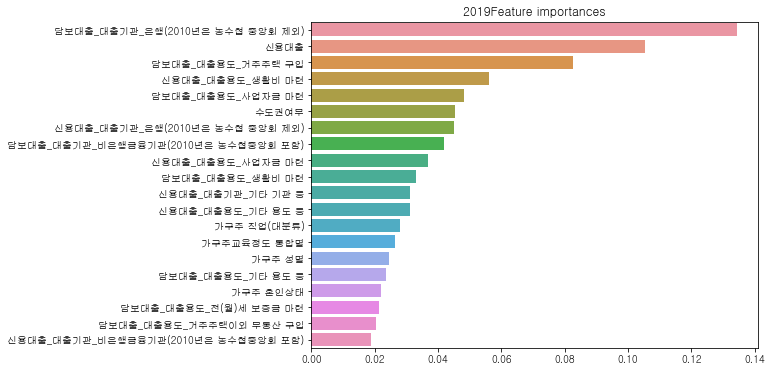

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

ftr_importances_values = dt_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )


#한글폰트 적용
path = 'C:/Windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)


# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('2019Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

# LightGBM, SMOTE

In [6]:
df = pd.read_csv('./data/2019가계부채/data_fin.csv', engine='python')
df=df.drop(columns='Unnamed: 0')
df

,담보대출,담보대출_대출용도_거주주택 구입,담보대출_대출용도_거주주택이외 부동산 구입,담보대출_대출용도_전(월)세 보증금 마련,담보대출_대출용도_부채상환,담보대출_대출용도_사업자금 마련,담보대출_대출용도_생활비 마련,담보대출_대출용도_기타 용도 등,담보대출_대출기관_은행(2010년은 농수협 중앙회 제외),담보대출_대출기관_저축은행,...,신용대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함),신용대출_대출기관_보험회사,신용대출_대출기관_기타 기관 등,가구주 성별,가구주교육정도 통합별,가구주 혼인상태,입주형태,수도권여부,가구주 직업(대분류),부실가계
0,4000.0,0,0.0,4000,0,0.0,0,0.0,4000.0,0,...,0,0,0,0,1,1,0,1,0,1
1,10000.0,10000,0.0,0,0,0.0,0,0.0,10000.0,0,...,0,0,0,0,0,1,1,1,0,0
2,23000.0,23000,0.0,0,0,0.0,0,0.0,23000.0,0,...,0,0,0,0,1,1,1,1,0,0
3,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,1,1
4,4520.0,4520,0.0,0,0,0.0,0,0.0,4520.0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0,...,0,0,10000,0,1,1,1,0,0,0
9848,21000.0,0,21000.0,0,0,0.0,0,0.0,21000.0,0,...,0,0,0,0,1,1,1,0,0,0
9849,3600.0,3600,0.0,0,0,0.0,0,0.0,3600.0,0,...,0,0,0,0,1,1,1,0,0,0
9850,9200.0,0,0.0,9200,0,0.0,0,0.0,0.0,0,...,0,0,0,0,1,1,0,0,0,0


In [7]:
X = df.iloc[:,1:-1]
Y = df.iloc[:,-1]

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=369)

# 학습과 테스트 데이터 셋으로 분리

X_train , X_test , y_train , y_test = train_test_split(X, Y,
                                                       test_size=0.3,  random_state=11)

dt_clf.fit(X_train , y_train)

pred = dt_clf.predict(X_test)
pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [10]:
# df.info()

In [11]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    91.632831
1     8.367169
Name: 부실가계, dtype: float64
테스트 데이터 레이블 값 비율
0    91.441137
1     8.558863
Name: 부실가계, dtype: float64


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# 성능지표 출력 함수

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [18]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    get_clf_eval(tgt_test, pred)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# DecisionTree Classifier 생성
lr_clf = DecisionTreeClassifier(random_state=369)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

# get_clf_eval() 함수를 이용하여 평가 수행. 
get_clf_eval(y_test, lr_pred)


오차 행렬
[[2534  169]
 [ 231   22]]
정확도: 0.8647, 정밀도: 0.1152, 재현율: 0.0870,    F1: 0.0991, AUC:0.5122


In [14]:
from sklearn.linear_model import LogisticRegression


# LogisticRegresstion
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
# get_clf_eval() 함수를 이용하여 평가 수행. 
get_clf_eval(y_test, lr_pred)

오차 행렬
[[2697    6]
 [ 246    7]]
정확도: 0.9147, 정밀도: 0.5385, 재현율: 0.0277,    F1: 0.0526, AUC:0.5127


In [19]:
from lightgbm import LGBMClassifier

# LGMB
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[2642   61]
 [ 246    7]]
정확도: 0.8961, 정밀도: 0.1029, 재현율: 0.0277,    F1: 0.0436, AUC:0.5026


<AxesSubplot:>

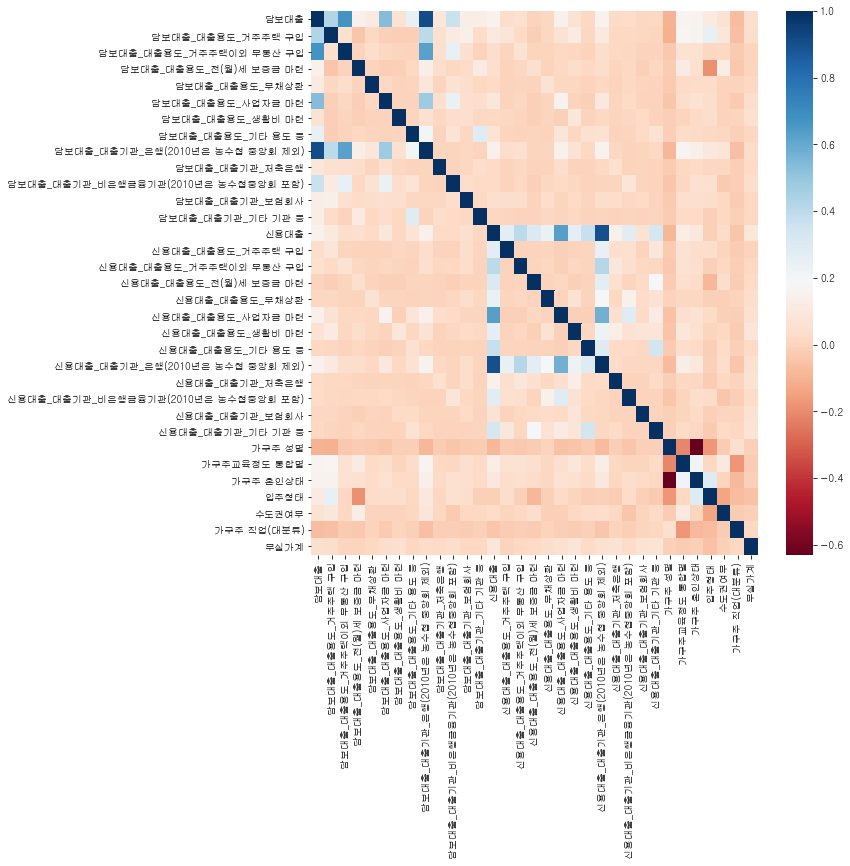

In [54]:
import seaborn as sns

plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr, cmap='RdBu')

# 이상치 제거

In [32]:
# sns.boxplot(data=df['HDRI'],color='red')
# plt.show

# SMOTE

In [21]:
# 오버샘플링 SMOTE 실행

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=369)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (6896, 31) (6896,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (12638, 31) (12638,)
SMOTE 적용 후 레이블 값 분포: 
 0    6319
1    6319
Name: 부실가계, dtype: int64


In [22]:
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[1963  740]
 [ 136  117]]
정확도: 0.7037, 정밀도: 0.1365, 재현율: 0.4625,    F1: 0.2108, AUC:0.5943


In [23]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    

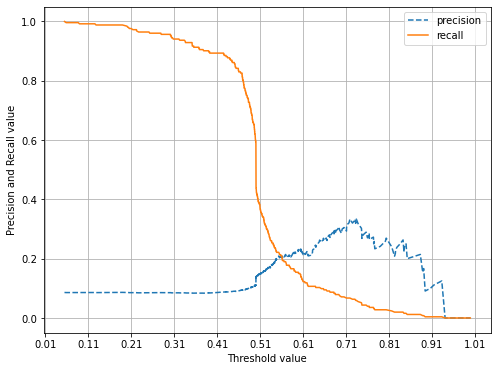

In [24]:
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [25]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[2356  347]
 [ 202   51]]
정확도: 0.8143, 정밀도: 0.1281, 재현율: 0.2016,    F1: 0.1567, AUC:0.5366


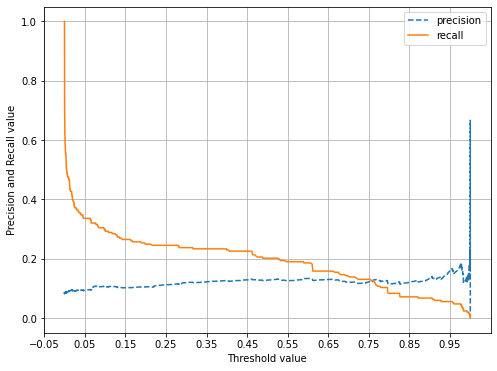

In [26]:
precision_recall_curve_plot( y_test, lgbm_clf.predict_proba(X_test)[:, 1] )

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

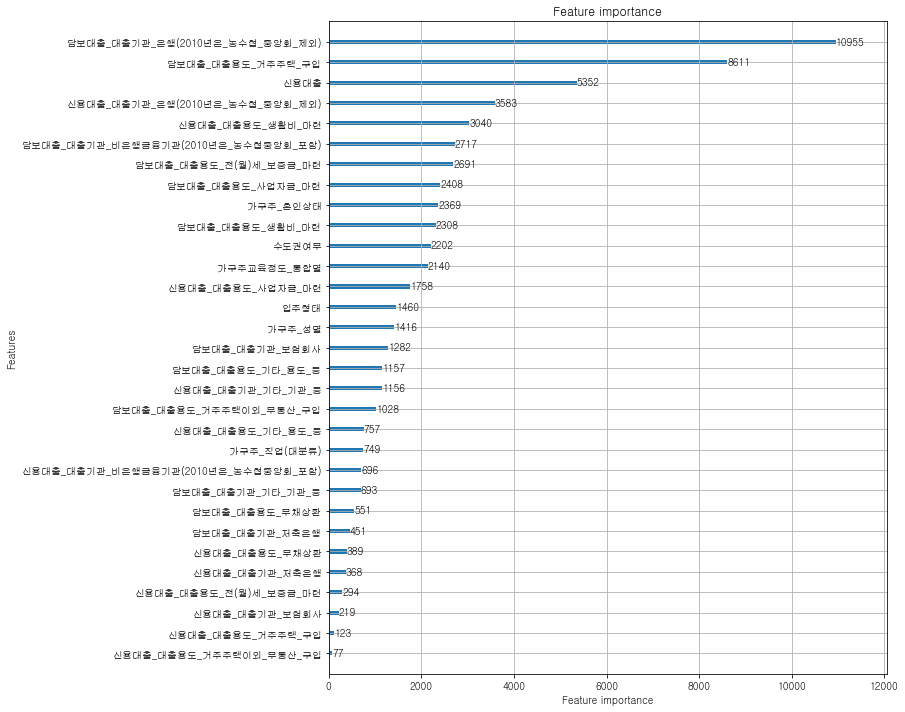

In [29]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

ftr_importances_values = dt_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )


#한글폰트 적용
path = 'C:/Windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)


fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_clf, ax=ax)

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# DecisionTree Classifier 생성
dtc_clf = DecisionTreeClassifier(random_state=369)
get_model_train_eval(dtc_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[2269  434]
 [ 181   72]]
정확도: 0.7919, 정밀도: 0.1423, 재현율: 0.2846,    F1: 0.1897, AUC:0.5620


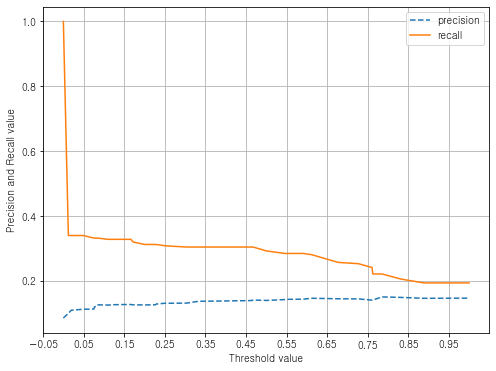

In [110]:
precision_recall_curve_plot( y_test, dtc_clf.predict_proba(X_test)[:, 1] )

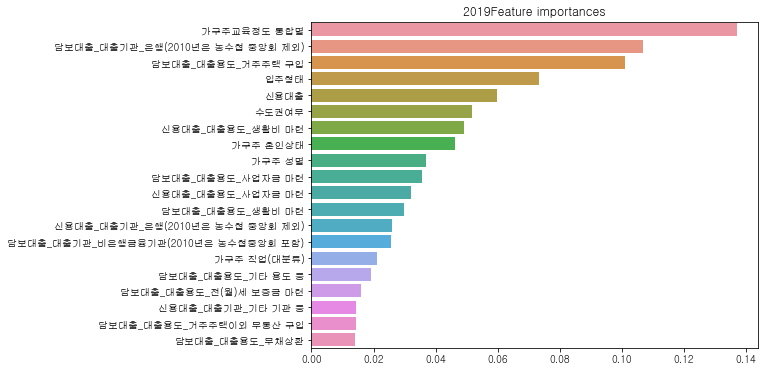

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

ftr_importances_values = dtc_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )


#한글폰트 적용
path = 'C:/Windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)


# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('2019Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [66]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle
import os

In [73]:
if not os.path.exists('models/exam_grade_classification_model'):
    os.makedirs('models/exam_grade_classification_model')

##########모델 생성

model = DecisionTreeClassifier(random_state=369)

##########모델 학습

model.fit(X_train, y_train)

##########모델 검증

print(model.score(X_train, y_train)) #

print(model.score(X_test, y_test)) #0.5

with open('models/exam_grade_classification_model/model.pkl', 'wb') as f:
    pickle.dump(model, f)



0.9888233467867122
0.9320898225280695


In [77]:
from sklearn.externals import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [71]:
X_train

,담보대출_대출용도_거주주택 구입,담보대출_대출용도_거주주택이외 부동산 구입,담보대출_대출용도_전(월)세 보증금 마련,담보대출_대출용도_부채상환,담보대출_대출용도_사업자금 마련,담보대출_대출용도_생활비 마련,담보대출_대출용도_기타 용도 등,담보대출_대출기관_은행(2010년은 농수협 중앙회 제외),담보대출_대출기관_저축은행,담보대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함),...,신용대출_대출기관_저축은행,신용대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함),신용대출_대출기관_보험회사,신용대출_대출기관_기타 기관 등,가구주 성별,가구주교육정도 통합별,가구주 혼인상태,입주형태,수도권여부,가구주 직업(대분류)
14304,0,0.0,0,0,0.0,0,0.0,0.0,0,0.0,...,0,0,0,0,0,0,1,1,0,0
7579,21000,0.0,0,0,0.0,0,0.0,21000.0,0,0.0,...,0,0,0,0,1,0,1,1,0,0
7776,0,0.0,0,0,0.0,0,0.0,0.0,0,0.0,...,0,0,0,0,0,1,1,0,1,0
6899,9848,0.0,0,0,0.0,0,0.0,9848.0,0,0.0,...,0,0,0,0,0,1,1,1,0,0
9434,0,0.0,0,0,0.0,0,0.0,0.0,0,0.0,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17677,0,0.0,0,0,0.0,0,0.0,0.0,0,0.0,...,0,0,0,0,1,0,1,0,0,0
4023,0,0.0,0,0,0.0,0,0.0,0.0,0,0.0,...,0,0,0,0,0,1,1,1,1,0
7259,0,0.0,0,0,0.0,0,0.0,0.0,0,0.0,...,0,0,0,0,1,0,0,0,0,0
3775,0,0.0,0,0,0.0,0,0.0,0.0,0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [76]:
clf_from_joblib = joblib.load('./models/exam_grade_classification_model/model.pkl') 
clf_from_joblib.predict(X)

FileNotFoundError: [Errno 2] No such file or directory: 'model.pkl'